# Loan application status<br>

People apply for laon and for the banks they have to validate that whether person should be given loan or not. We have to build a system which will take certain data point as input and provide output as loan should be given or not.
we have dataset and this dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.<br><br>
it is a biney classification problem and we will have to build a model on top of it. 




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
loan_details_ds = pd.read_csv("Loan_applicant_details.csv")
loan_details_ds.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
loan_details_ds.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [4]:
loan_details_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Dataset has 614 observations and 13 column including Target column, we have 8 object type columns, 5 numeric columns.target columns is a binery value columns.we have missing value in the columns check lets them

In [5]:
# checking missing values

missing = {}
for i in loan_details_ds.columns:
    if loan_details_ds[i].isnull().sum():
        missing[i] = loan_details_ds[i].isnull().sum()
print(missing)

{'Gender': 13, 'Married': 3, 'Dependents': 15, 'Self_Employed': 32, 'LoanAmount': 22, 'Loan_Amount_Term': 14, 'Credit_History': 50}


we have missing value in 7 columns out of 13. we will impute them in coming steps

In [6]:
loan_details_ds.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


we have huge variance in Applicantincome column and it is left skewed one and we have same observation for coapplicantincome as well. Minimum co applicant income is 0 till 25th percentile.<br>
loan amount is right skewed and we see that there are some extreme value are there. Loan_Amount_term is the year of loan, min is 1 year and maximum is 40. credit history is binery column with 0 and 1 values. assuming that credit history 1 is good and 0 is not good

In [7]:
loan_details_ds.select_dtypes(include="object").describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001197,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


count of Male  applying loan is higher than female. 65% people are married who appiled for loan, 79% people are graduate and 38% people belong to semiurban area.
68% applicants' application are accepted.

In [8]:
loan_details_ds.isnull().sum()/len(loan_details_ds)*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

Missing values are not more than 8% in dataset, we see missing value percentages columns wise in above table,i will impute them wth mean median and mode

# Missing Value imputaion

In [9]:
loan_details_ds["Gender"] = loan_details_ds["Gender"].fillna(loan_details_ds["Gender"].mode()[0])
loan_details_ds["Married"] = loan_details_ds["Married"].fillna(loan_details_ds["Married"].mode()[0])
loan_details_ds["Dependents"] = loan_details_ds["Dependents"].fillna(loan_details_ds["Dependents"].mode()[0])
loan_details_ds["Self_Employed"] = loan_details_ds["Self_Employed"].fillna(loan_details_ds["Self_Employed"].mode()[0])
loan_details_ds["LoanAmount"] = loan_details_ds["LoanAmount"].fillna(loan_details_ds["LoanAmount"].median())
loan_details_ds["Loan_Amount_Term"] = loan_details_ds["Loan_Amount_Term"].fillna(loan_details_ds["Loan_Amount_Term"].median())

In [10]:
loan_details_ds.groupby(["Loan_Status","Credit_History"])["Loan_Status"].count()

Loan_Status  Credit_History
N            0.0                82
             1.0                97
Y            0.0                 7
             1.0               378
Name: Loan_Status, dtype: int64

we can clearly see that if credit history is ok you wont have dificult time to get loan passed

In [11]:
def impute_credit_history(x):
    credit = x[0]
    Loan_Status = x[1]
    
    if pd.isnull(credit):
        if Loan_Status =="Y":
            return 1
        elif Loan_Status =="N":
            return 0
    else:
        return credit

In [12]:
loan_details_ds["Credit_History"] = loan_details_ds[["Credit_History","Loan_Status"]].apply(impute_credit_history,axis =1) 

In [13]:
missing = {}
for i in loan_details_ds.columns:
    if loan_details_ds[i].isnull().sum():
        missing[i] = loan_details_ds[i].isnull().sum()
print(missing)

{}


We have imputed missing values from all the columns.

# EDA

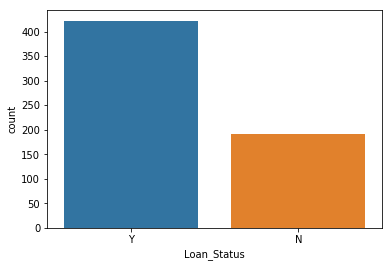

In [14]:

sns.countplot(loan_details_ds["Loan_Status"])

69%  Y and 31% N, it is imbalance problem

In [15]:
def check_values(x):
    for i in x.columns:
        print(x[i].value_counts(),"\n")


In [16]:
check_values(loan_details_ds.iloc[:,1::].select_dtypes(include ="object"))

Male      502
Female    112
Name: Gender, dtype: int64 

Yes    401
No     213
Name: Married, dtype: int64 

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64 

Graduate        480
Not Graduate    134
Name: Education, dtype: int64 

No     532
Yes     82
Name: Self_Employed, dtype: int64 

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64 

Y    422
N    192
Name: Loan_Status, dtype: int64 



from the depandents column, we observe that individual has applied for loan is more, may their income is enough for loan acceptance.  

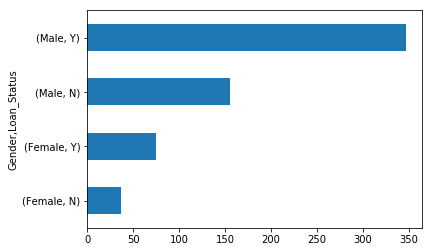

In [17]:
loan_details_ds.groupby(["Gender","Loan_Status"])["Loan_Status"].count().plot(kind = "barh")

maximum loan application are made by Male and we see the acceptance and rejection accordingly which is high 

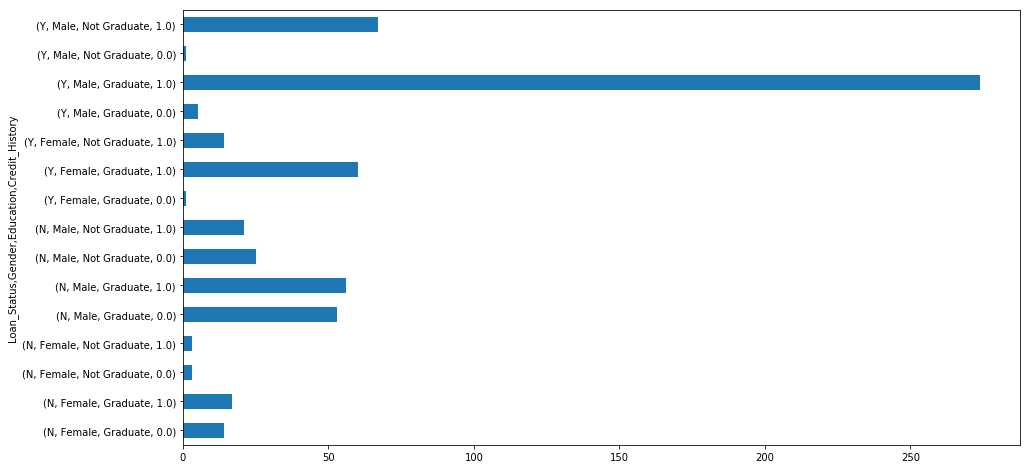

In [18]:
plt.figure(figsize=(15,8))
loan_details_ds.groupby(["Loan_Status","Gender","Education","Credit_History"])["Loan_Status"].count().plot(kind = "barh")

maximum participation has come from people who are graduate. we can clearly see that graduate people with good credit history have higher loan application.it seems that  graduate are earning more. 

In [19]:
loan_details_ds.groupby("Education")["ApplicantIncome"].mean()

Education
Graduate        5857.433333
Not Graduate    3777.283582
Name: ApplicantIncome, dtype: float64

In [20]:
loan_details_ds.groupby(["Education","Dependents"])[["ApplicantIncome","CoapplicantIncome","LoanAmount"]].mean()

ApplicantIncome  CoapplicantIncome  LoanAmount
Education    Dependents                                                
Graduate     0               5200.234266        1696.315105  140.454545
             1               6562.333333        1332.987654  163.024691
             2               5360.597403        1781.516883  159.610390
             3+             10555.166667        2613.694444  219.250000
Not Graduate 0               3879.162162        1232.040541  115.527027
             1               3647.761905        1785.904762  135.809524
             2               3534.958333        1384.791667  117.333333
             3+              3843.733333         609.800000  114.466667

it clearly tells that graduate are earning more than not graduate. average income along with dependants in graduate category is high than not graduate.With 3+ dependents loan amount is high under gradate bucket however under non graduate bucket it is 115 and the strange thing is that with 3+ dependents loan amount is equal as no dependance 

In [21]:
loan_details_ds.groupby(["Gender","Dependents"])[["CoapplicantIncome"]].count()

CoapplicantIncome
Gender Dependents                   
Female 0                          83
       1                          19
       2                           7
       3+                          3
Male   0                         277
       1                          83
       2                          94
       3+                         48

89% co applicant are male , we can assume that from a family mainly male member working and adding their income to take loan

In [22]:
loan_details_ds.groupby(["Married","Gender"])[["ApplicantIncome","CoapplicantIncome"]].mean()

ApplicantIncome  CoapplicantIncome
Married Gender                                    
No      Female      4503.787500        1020.012500
        Male        5251.045113        1494.932331
Yes     Female      4992.687500        1328.000000
        Male        5689.067751        1822.552629

In [23]:
pd.pivot_table(loan_details_ds, values = ["ApplicantIncome"], index = "Gender", aggfunc = "mean", columns = "Married")

ApplicantIncome             
Married              No          Yes
Gender                              
Female      4503.787500  4992.687500
Male        5251.045113  5689.067751

if people are married their income is high, we can see it from the above table

In [24]:
loan_details_ds.groupby(["Self_Employed","Gender"])[["ApplicantIncome", "LoanAmount"]].mean()

ApplicantIncome  LoanAmount
Self_Employed Gender                             
No            Female      3966.257732  120.402062
              Male        5351.195402  146.760920
Yes           Female      9022.800000  167.666667
              Male        7013.208955  171.000000

self_employed female are earning more than male, it seems they are good enterprenure but average loan amount is high for male.

In [25]:
loan_details_ds.groupby(["Self_Employed","Married"])[["ApplicantIncome","CoapplicantIncome", "LoanAmount","Loan_Amount_Term"]].mean()

ApplicantIncome  CoapplicantIncome  LoanAmount  \
Self_Employed Married                                                   
No            No           4509.459459        1449.956757  124.270270   
              Yes          5412.815562        1740.901787  151.383285   
Yes           No           8015.785714         435.178571  159.142857   
              Yes          7051.574074        2054.166667  176.222222   

                       Loan_Amount_Term  
Self_Employed Married                    
No            No             351.632432  
              Yes            338.801153  
Yes           No             349.285714  
              Yes            330.444444

In [26]:
loan_details_ds.groupby("Property_Area")[["ApplicantIncome", "LoanAmount"]].mean()

,ApplicantIncome,LoanAmount
Property_Area,,
Rural,5554.083799,151.446927
Semiurban,5292.261803,145.128755
Urban,5398.247525,141.425743


self employed and but no Married are earning more than self employed and married, self_employed and married earning less than self_employed but no Married have taken more loan by adding co applicant and average repayment duartion is 27.5 years

In [27]:
num_col = loan_details_ds.select_dtypes(exclude = "object")

In [28]:
num_col.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [29]:
def numeric_col_graph(x,variable):
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    sns.distplot(x[variable])
    
    plt.subplot(122)
    sns.boxplot(x[variable])
    plt.show();

In [30]:
def outlier_treatment(x,variable):
    Q1 = x[variable].quantile(.25)
    Q3 = x[variable].quantile(.75)
    
    IQR = Q3-Q1
    lower_bound = Q1-(1.5*IQR)
    upper_bound = Q3+(1.5*IQR)
    x[variable] = np.where(x[variable]> upper_bound,upper_bound , np.where(x[variable] < lower_bound,lower_bound, x[variable]))

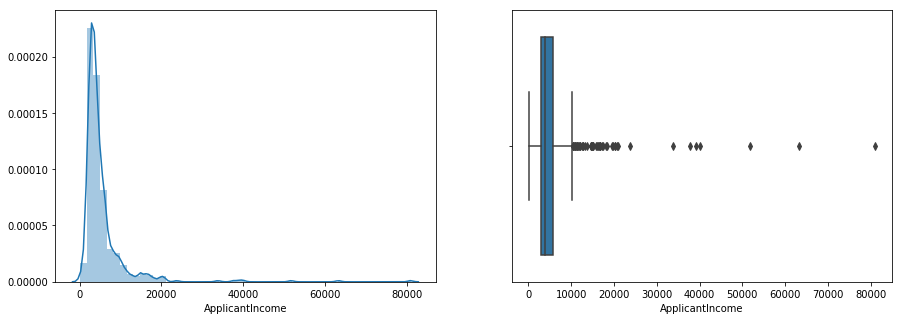

In [31]:
numeric_col_graph(loan_details_ds,"ApplicantIncome")

Applicant income in right skewed and have lot of extreme values.will cap them with IQR methoed because we less data point and dropping them we will lose information

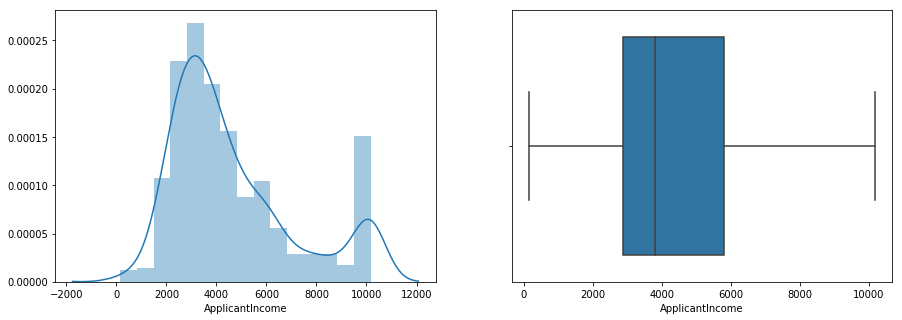

In [32]:
outlier_treatment(loan_details_ds,"ApplicantIncome")
numeric_col_graph(loan_details_ds,"ApplicantIncome")

now it looks better and close to normal distribution and we have not outlier in this column.

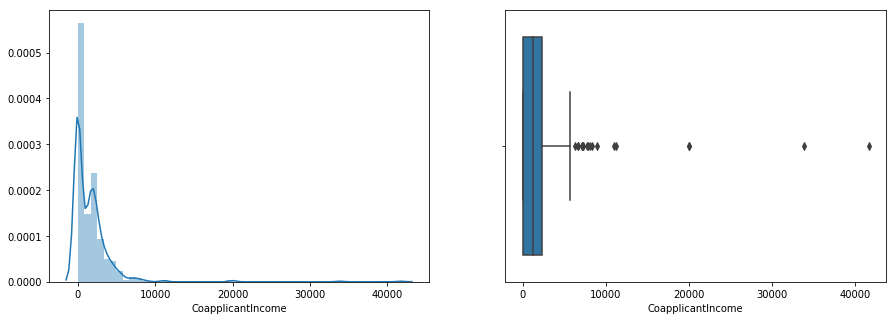

In [33]:
numeric_col_graph(loan_details_ds,"CoapplicantIncome")

in Coapplicant we observe that data is right skewed and outlier also present

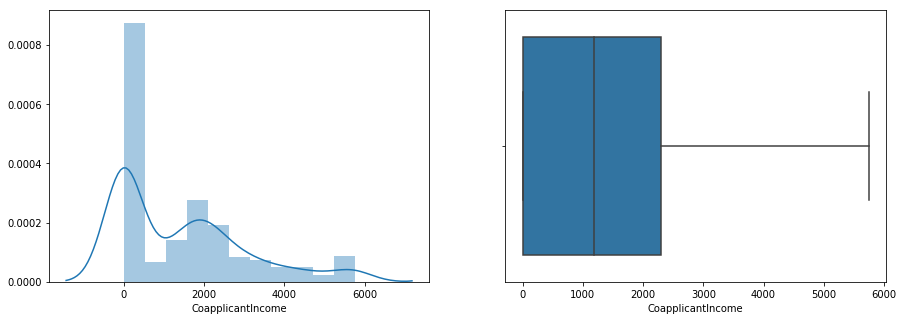

In [34]:
outlier_treatment(loan_details_ds,"CoapplicantIncome")
numeric_col_graph(loan_details_ds,"CoapplicantIncome")

All the extreme values have been capped with upper limit but we see high variability in the dataset range

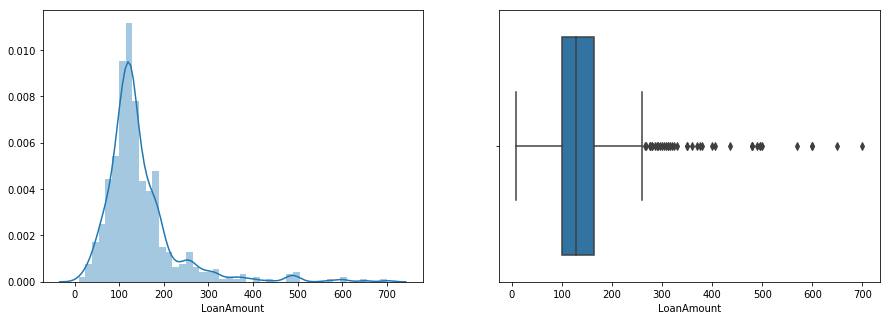

In [35]:
numeric_col_graph(loan_details_ds,"LoanAmount")

We see that loan amount is high is some of the cases which are resulted in outlier. 

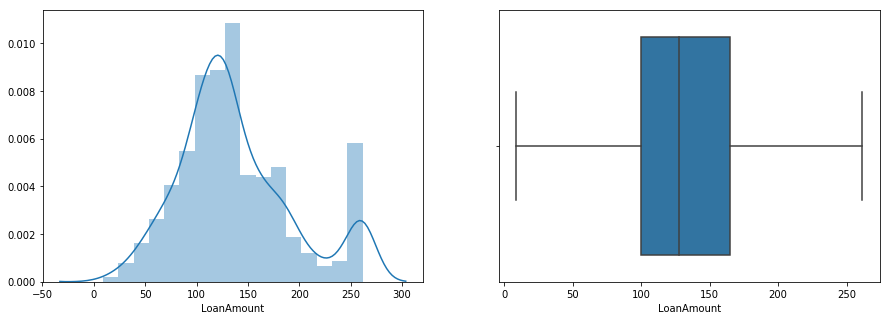

In [36]:
outlier_treatment(loan_details_ds,"LoanAmount")
numeric_col_graph(loan_details_ds,"LoanAmount")

Now it has come closure to normal distribution and no extreme values,Numeric columns'outliers have been handled with IQR method, we see that these are now more close to normal distribution,

In [37]:
loan_details_ds.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [38]:
loan_details_ds.select_dtypes(exclude = "object").skew()

ApplicantIncome      1.039846
CoapplicantIncome    1.012763
LoanAmount           0.683693
Loan_Amount_Term    -2.402112
Credit_History      -1.798506
dtype: float64

In [39]:
# Correcitng the  skewness from the dataset
loan_details_ds["ApplicantIncome"] = np.sqrt(loan_details_ds["ApplicantIncome"])
loan_details_ds["CoapplicantIncome"] = np.sqrt(loan_details_ds["CoapplicantIncome"]) 
loan_details_ds["LoanAmount"] = np.sqrt(loan_details_ds["LoanAmount"])

In [40]:
loan_details_ds.select_dtypes(exclude = "object").skew()

ApplicantIncome      0.540741
CoapplicantIncome    0.192830
LoanAmount           0.064140
Loan_Amount_Term    -2.402112
Credit_History      -1.798506
dtype: float64

# Label Encoding

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

loan_details_ds["Gender"] = le.fit_transform(loan_details_ds["Gender"])
loan_details_ds["Married"] = le.fit_transform(loan_details_ds["Married"])
loan_details_ds["Education"] = le.fit_transform(loan_details_ds["Education"])
loan_details_ds["Property_Area"] = le.fit_transform(loan_details_ds["Property_Area"])
loan_details_ds["Self_Employed"] = le.fit_transform(loan_details_ds["Self_Employed"])

# we have replace Y wtih 1 and N with 0

loan_details_ds["Loan_Status"].replace({"Y":1,"N":0}, inplace = True) 



In [42]:
loan_details_ds.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,76.478755,0.000000,11.313708,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,67.697858,38.832976,11.313708,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,54.772256,0.000000,8.124038,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,50.823223,48.559242,10.954451,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,77.459667,0.000000,11.874342,360.0,1.0,2,1


In [43]:
loan_details_ds["Dependents"] = loan_details_ds["Dependents"].map(lambda x:x.rstrip("+")) # removing + sign from dependant column

Deleting Loan_ID because it is not adding any value to target columns

In [44]:
loan_details_ds.drop("Loan_ID",axis =1,inplace = True)

# Correaltion plot

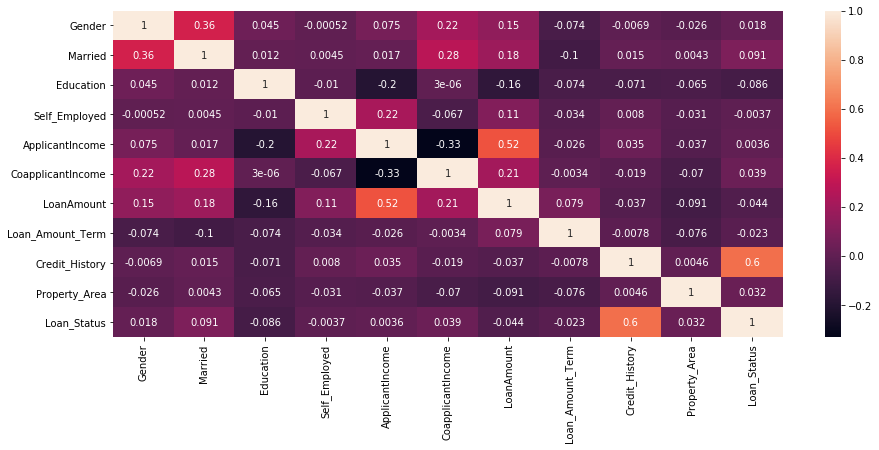

In [45]:
plt.figure(figsize=(15,6))
sns.heatmap(loan_details_ds.corr(),annot= True)

looking at the correlation plot, only Credit_History is the only feature which is adding value to target variable 

# Seprateing Predictor from target variable

In [46]:
X = loan_details_ds.drop("Loan_Status",axis = 1)
y = loan_details_ds["Loan_Status"]

In [47]:
from imblearn.combine import SMOTETomek
smote = SMOTETomek()
resam_X, resam_y = smote.fit_sample(X,y)

# Creating Model

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [49]:
for i in range(40,300,60):
    X_train,X_test,y_train,y_test = train_test_split(resam_X,resam_y,test_size = 0.25,random_state =i)
    RF = RandomForestClassifier()
    RF.fit(X_train,y_train)
    pred = RF.predict(X_test)
    print("Accuracy_score",accuracy_score(y_test,pred),"random_state",i)
    print("Confusion_matrix","\n",confusion_matrix(y_test,pred))
    print("classification_report","\n",classification_report(y_test,pred))

Accuracy_score 0.8291457286432161 random_state 40
Confusion_matrix 
 [[88 21]
 [13 77]]
classification_report 
               precision    recall  f1-score   support

           0       0.87      0.81      0.84       109
           1       0.79      0.86      0.82        90

    accuracy                           0.83       199
   macro avg       0.83      0.83      0.83       199
weighted avg       0.83      0.83      0.83       199

Accuracy_score 0.8542713567839196 random_state 100
Confusion_matrix 
 [[ 59  20]
 [  9 111]]
classification_report 
               precision    recall  f1-score   support

           0       0.87      0.75      0.80        79
           1       0.85      0.93      0.88       120

    accuracy                           0.85       199
   macro avg       0.86      0.84      0.84       199
weighted avg       0.86      0.85      0.85       199

Accuracy_score 0.8894472361809045 random_state 160
Confusion_matrix 
 [[79 17]
 [ 5 98]]
classification_report 
     

In [50]:
model = [LogisticRegression(),AdaBoostClassifier(),KNeighborsClassifier(), SVC()]

for i in model:
    X_train1,X_test1,y_train1,y_test1 = train_test_split(resam_X,resam_y,test_size = 0.25,random_state = 160)
    i.fit(X_train1,y_train1)
    pred = i.predict(X_test1)
    print("Accuracy_score",accuracy_score(y_test1,pred),i)
    print("Confusion_matrix","\n",confusion_matrix(y_test1,pred))
    print("classification_report","\n",classification_report(y_test1,pred))


Accuracy_score 0.8040201005025126 LogisticRegression()
Confusion_matrix 
 [[64 32]
 [ 7 96]]
classification_report 
               precision    recall  f1-score   support

           0       0.90      0.67      0.77        96
           1       0.75      0.93      0.83       103

    accuracy                           0.80       199
   macro avg       0.83      0.80      0.80       199
weighted avg       0.82      0.80      0.80       199

Accuracy_score 0.4824120603015075 AdaBoostClassifier(algorithm='SAMME', base_estimator=SVC())
Confusion_matrix 
 [[ 96   0]
 [103   0]]
classification_report 
               precision    recall  f1-score   support

           0       0.48      1.00      0.65        96
           1       0.00      0.00      0.00       103

    accuracy                           0.48       199
   macro avg       0.24      0.50      0.33       199
weighted avg       0.23      0.48      0.31       199

Accuracy_score 0.7085427135678392 KNeighborsClassifier()
Confusion_ma

have tried Modeling on both the dataset, imbalance dataset and without imbalance dataset. accuracy is better on balance dataset and good F1.
we are selecting Randomforest as final algorithm for further process


# GridSearchCV

In [52]:
Para = {"n_estimators" :[100,200,300,400],
        "max_depth" :[1,2,3,4,5],
        "criterion":["gini", "entropy"],
        "max_features" :["auto", "sqrt", "log2"]}

grid_search = GridSearchCV(RF,Para,cv = 5, scoring = "f1",n_jobs =-1, verbose =2)
grid_search.fit(X_train1,y_train1)
print(grid_search.best_params_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   59.0s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  4.2min finished


{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 100}


# Cross_val_score

In [53]:
best_RF = RandomForestClassifier(criterion ="entropy",max_depth = 5, max_features = "auto",n_estimators =100)

for i in range(2,11):
    cross_score = cross_val_score(best_RF,resam_X,resam_y,cv =10,scoring = "f1")
    print(i,"mean",cross_score.mean(),"STD", cross_score.std())

2 mean 0.8538783263521552 STD 0.0642127325335725
3 mean 0.8554686432696801 STD 0.0675007358908916
4 mean 0.8568606827943379 STD 0.07034661652646795
5 mean 0.8545042013991191 STD 0.06299258088228694
6 mean 0.8519052316475495 STD 0.06606032143350511
7 mean 0.8575361741227038 STD 0.06458962490217135
8 mean 0.8579904824514635 STD 0.06396336828629802
9 mean 0.8513905672656122 STD 0.06454005601300468
10 mean 0.8558597452551423 STD 0.06358521436284138


CV 8 gives highest score with low standard deviation

# Model Saving

In [54]:
best_RF = RandomForestClassifier(criterion ="entropy",max_depth = 5, max_features = "log2",n_estimators =300)
best_RF.fit(resam_X,resam_y)

import pickle
filename = "Loan_applicant_predict.pkl"

with open(filename,"wb")as f:
    pickle.dump(best_RF,f)

# Conclusion<br>
Dataset consists mix of features, object and numreric, it covers all the possible information about the customer for taking a loan.I have done some analysis to understand the data more.<br>
it has observed that it is binery classification problem, when we checked the class label, i have found that it as imbalance, mean Y class was high than N class. Have checked that number of Male candidate applied for loan is higher than female. I have checked self_employed column with Applicant income and found that self_employed female is earning more than male but male has high loan amount with the help of coapplicant.<br>

Moving to numeric columns, have checked their distribution and outlier values, they were not is shape and observed lot of extreme values.i have corrected them, outlier were capped with IQR method.<br>
it was a imbalance dataset, have applied upsampling technique and made it balance datset. i have applied multiple model on the dataset and found that Randonforest worked well and gave good precision and F1 score for both the clases.



